In [1]:
import copy
import pyprind
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [2]:
url = 'https://www.lsf.tu-dortmund.de/qisserver/rds?state=wtree&search=1&trex=step&root120171=72353|73510&P.vx=kurz'
url = 'https://www.lsf.tu-dortmund.de/qisserver/rds?state=wtree&search=1&trex=step&root120172=79165|78789&P.vx=kurz'
url = 'https://www.lsf.tu-dortmund.de/qisserver/rds;jsessionid=8497CB5404D15F0E834D5854C506A005.lsf8?state=wtree&search=1&trex=step&root120172=79165&P.vx=kurz'

html = requests.get(url).text
bs = BeautifulSoup(html, 'lxml')

parents = ['Vorlesungsverzeichnis']
links = [[link.get_text().strip(), link['href'], copy.deepcopy(parents)] for link in bs.findAll('a', {'class':'ueb'}) if link.get_text().strip() not in parents]

data = copy.deepcopy(links)
while links:
    name, url, parent = links.pop()
    try:
        parent.append(name)
        html = requests.get(url).text
        bs = BeautifulSoup(html, 'lxml')
    
        new_links = [[link.get_text().strip(), link['href'], copy.deepcopy(parent)] for link in bs.findAll('a', {'class':'ueb'}) if link.get_text().strip() not in parent]
        
        if new_links:
            links.extend(new_links)
            data.extend(new_links)
    except:
        print('Fehler')
        
len(data)

4126

In [3]:
events = []
bar = pyprind.ProgPercent(len(data))
for name, url, parents in data:
    html = requests.get(url).text
    bs = BeautifulSoup(html, 'lxml')
    
    for event in bs.findAll('a', {'class':'regular'}):
        text = event.get_text()
        if text not in ['Startseite', 'mittel', 'lang']:
            events.append([copy.deepcopy(parents), text, event['href']])
    bar.update()

[100 %] Time elapsed: 00:31:15 | ETA: 00:00:00
Total time elapsed: 00:31:15


In [4]:
transformed = []
for row in events:
    event = row[1]
    url = row[2]
    try:
        eins = row[0][1]
    except:
        eins = None
    try:
        zwei = row[0][2]
    except:
        zwei = None
    try:
        drei = row[0][3]
    except:
        drei = None
    try:
        vier = row[0][4]
    except:
        vier = None
    try:
        fünf = row[0][5]
    except:
        fünf = None
    try:
        sechs = row[0][6]
    except:
        sechs = None
    try:
        sieben = row[0][7]
    except:
        sieben = None
    try:
        acht = row[0][8]
    except:
        acht = None
    transformed.append([eins, zwei, drei, vier, fünf, sechs, sieben, acht, event, url])

In [5]:
df = pd.DataFrame(transformed, columns=['Ebene 1', 'Ebene 2', 'Ebene 3', 'Ebene 4', 'Ebene 5', 'Ebene 6', 'Ebene 7', 'Ebene 8', 'Event', 'URL'])
df.tail()

,Ebene 1,Ebene 2,Ebene 3,Ebene 4,Ebene 5,Ebene 6,Ebene 7,Ebene 8,Event,URL
9178,Mathematik,B. Lehrveranst. für: Bachelor-/Masterstudiengä...,B.4 Seminare und Praktika,None,None,None,None,None,Oberseminar Diskrete Optimierung,https://www.lsf.tu-dortmund.de/qisserver/rds;j...
9179,Mathematik,B. Lehrveranst. für: Bachelor-/Masterstudiengä...,B.4 Seminare und Praktika,None,None,None,None,None,Oberseminar Wissenschaftliches Rechnen,https://www.lsf.tu-dortmund.de/qisserver/rds;j...
9180,Mathematik,B. Lehrveranst. für: Bachelor-/Masterstudiengä...,B.4 Seminare und Praktika,None,None,None,None,None,Gemeinsames Oberseminar Differentialgeometrie ...,https://www.lsf.tu-dortmund.de/qisserver/rds;j...
9181,Mathematik,B. Lehrveranst. für: Bachelor-/Masterstudiengä...,B.4 Seminare und Praktika,None,None,None,None,None,Oberseminar Mathematische Physik & Dynamische ...,https://www.lsf.tu-dortmund.de/qisserver/rds;j...
9182,Mathematik,B. Lehrveranst. für: Bachelor-/Masterstudiengä...,B.4 Seminare und Praktika,None,None,None,None,None,Oberseminar zu Adaptive Finite Elemente Methoden,https://www.lsf.tu-dortmund.de/qisserver/rds;j...


In [6]:
df.shape

(9183, 10)

In [7]:
event_data = []
bar = pyprind.ProgPercent(df.shape[0])
for url in df['URL'].values:
    try:
        html = requests.get(url).text
        bs = BeautifulSoup(html, 'lxml')

        try:
            veranstaltungsart = bs.find('td', {'headers':'basic_1'}).get_text()
        except:
            veranstaltungsart = None
        try:
            veranstaltungsnummer = int(bs.find('td', {'headers':'basic_3'}).get_text())
        except:
            veranstaltungsnummer = None
        try:
            semester = bs.find('td', {'headers':'basic_5'}).get_text()
        except:
            semester = None
        try:
            erwartete_teilnehmer = int(bs.find('td', {'headers':'basic_7'}).get_text())
        except:
            erwartete_teilnehmer = None
        try:
            rhythmus = bs.find('td', {'headers':'basic_9'}).get_text()
        except:
            rhythmus = None
        try:
            credits = int(bs.find('td', {'headers':'basic_11'}).get_text())
        except:
            credits = None
        try:
            langtext = bs.find('td', {'headers':'basic_2'}).get_text()
        except:
            langtext = None
        try:
            kurztext = bs.find('td', {'headers':'basic_4'}).get_text()
        except:
            kurztext = None
        try:
            sws = int(bs.find('td', {'headers':'basic_6'}).get_text())
        except:
            sws = None
        try:
            maximale_teilnehmer = int(bs.find('td', {'headers':'basic_8'}).get_text())
        except:
            maximale_teilnehmer = None
        try:
            studienjahr = bs.find('td', {'headers':'basic_10'}).get_text()
        except:
            studienjahr = None
        try:
            belegung = bs.find('td', {'headers':'basic_12'}).get_text()
        except:
            belegung=None
        try:
            hyperlink = bs.find('td', {'headers':'basic_13'}).get_text()
        except:
            hyperlink = None

        event_data.append([veranstaltungsart, veranstaltungsnummer, semester, erwartete_teilnehmer, rhythmus, credits, langtext, kurztext, sws, maximale_teilnehmer, studienjahr, belegung, hyperlink])
    except:
        print(url)
    bar.update()

[100 %] Time elapsed: 01:45:44 | ETA: 00:00:00
Total time elapsed: 01:45:44


In [8]:
df_data = pd.DataFrame(event_data, columns=['Veranstaltungsart', 'Veranstaltungsnummer', 'Semester', 'Erwartete Teilnehmer', 'Rhythmus', 'Credits', 'Langtext', 'Kurztext', 'SWS', 'Maximale Teilnehmer', 'Studienjahr', 'Belegung', 'Hyperlink'])

In [9]:
df_data.head()

,Veranstaltungsart,Veranstaltungsnummer,Semester,Erwartete Teilnehmer,Rhythmus,Credits,Langtext,Kurztext,SWS,Maximale Teilnehmer,Studienjahr,Belegung,Hyperlink
0,Infoveranstaltung,10490.0,WiSe 2017/18,NaN,jedes Semester,NaN,,,NaN,NaN,,\r\n \t\t\t \t\t\tKeine Belegpflicht\r\n...,\n\n\n
1,Sonderveranstaltung (Uni),30013291.0,WiSe 2017/18,NaN,jedes Semester,NaN,,,NaN,NaN,,\r\n \t\t\t \t\t\tBelegpflicht\r\n \t\t,\n\n\n
2,None,NaN,None,NaN,None,NaN,None,None,NaN,NaN,None,None,None
3,Blockkurs,51073.0,WiSe 2017/18,NaN,jedes Semester,NaN,,,NaN,NaN,,\r\n \t\t\t \t\t\tBelegpflicht\r\n \t\t,\n\n\n
4,Kurs,60200.0,WiSe 2017/18,130.0,jedes 2. Semester,10.0,,,NaN,130.0,,None,\n\n\n


In [14]:
df_all = pd.concat([df, df_data], axis=1)
df_all.shape

(9183, 23)

In [15]:
df_all.head(20)

,Ebene 1,Ebene 2,Ebene 3,Ebene 4,Ebene 5,Ebene 6,Ebene 7,Ebene 8,Event,URL,...,Erwartete Teilnehmer,Rhythmus,Credits,Langtext,Kurztext,SWS,Maximale Teilnehmer,Studienjahr,Belegung,Hyperlink
0,None,None,None,None,None,None,None,None,Helpdesk Mathematik / Projekt Studienstart Mat...,https://www.lsf.tu-dortmund.de/qisserver/rds;j...,...,NaN,jedes Semester,NaN,,,NaN,NaN,,\r\n \t\t\t \t\t\tKeine Belegpflicht\r\n...,\n\n\n
1,None,None,None,None,None,None,None,None,Zwischen Brötchen und Borussia (Vortrag),https://www.lsf.tu-dortmund.de/qisserver/rds;j...,...,NaN,jedes Semester,NaN,,,NaN,NaN,,\r\n \t\t\t \t\t\tBelegpflicht\r\n \t\t,\n\n\n
2,None,None,None,None,None,None,None,None,belegen/abmelden,https://www.lsf.tu-dortmund.de/qisserver/rds;j...,...,NaN,None,NaN,None,None,NaN,NaN,None,None,None
3,None,None,None,None,None,None,None,None,Data Mining Cup,https://www.lsf.tu-dortmund.de/qisserver/rds;j...,...,NaN,jedes Semester,NaN,,,NaN,NaN,,\r\n \t\t\t \t\t\tBelegpflicht\r\n \t\t,\n\n\n
4,None,None,None,None,None,None,None,None,Gruppenarbeit BCI,https://www.lsf.tu-dortmund.de/qisserver/rds;j...,...,130.0,jedes 2. Semester,10.0,,,NaN,130.0,,None,\n\n\n
5,None,None,None,None,None,None,None,None,Masterbegrüßung Maschinenbau,https://www.lsf.tu-dortmund.de/qisserver/rds;j...,...,NaN,keine Übernahme,NaN,,,NaN,NaN,,\r\n \t\t\t \t\t\tBelegpflicht\r\n \t\t,\n\n\n
6,None,None,None,None,None,None,None,None,Ausgleichsvorgänge in elektrischen Antrieben,https://www.lsf.tu-dortmund.de/qisserver/rds;j...,...,25.0,jedes 2. Semester,NaN,,,2.0,NaN,,\r\n \t\t\t \t\t\tBelegpflicht\r\n \t\t,\n\r\n\t\t\t\thttp://www.ewa.e-technik.tu-dort...
7,None,None,None,None,None,None,None,None,Aufbau und Netzbetrieb von Windkraftanlagen,https://www.lsf.tu-dortmund.de/qisserver/rds;j...,...,NaN,jedes 2. Semester,NaN,,,1.0,NaN,,\r\n \t\t\t \t\t\tBelegpflicht\r\n \t\t,\n\n\n
8,None,None,None,None,None,None,None,None,WPF Planen und Bauen mit BIM,https://www.lsf.tu-dortmund.de/qisserver/rds;j...,...,20.0,jedes 2. Semester,NaN,,,2.0,20.0,,\r\n \t\t\t \t\t\tBelegpflicht\r\n \t\t,\n\n\n
9,None,None,None,None,None,None,None,None,Einzelbuchungen GB II Raum 413,https://www.lsf.tu-dortmund.de/qisserver/rds;j...,...,NaN,keine Übernahme,NaN,,,NaN,NaN,,\r\n \t\t\t \t\t\tKeine Belegpflicht\r\n...,\n\n\n


In [16]:
df_all['Semester'].unique()

array(['WiSe 2017/18', None], dtype=object)

In [17]:
df_all.to_csv('Vorlesungsverzeichnis.csv', index=False)

# Wieviele Plätze gibt es pro Semester für die IPs/IBs für die Rehabilitationspädagogen?

In [2]:
file = 'Rehabilitationswissenschaften'
result = pd.read_csv('Vorlesungsverzeichnis.csv')

# In welche Bereiche unterteilen sich die Ebenen?

In [3]:
result['Ebene 1'].unique()

array([nan, 'Ruhr Campus Online', 'Lectures held in English',
       'Lehramtsstudium (fakultätsübergreifend)', 'Studium Fundamentale',
       'Zentrale Studienberatung',
       'ZHB (Fremdsprachen, Forschungswerkstatt, DoBuS)',
       'IT und Medien Centrum (ITMC)', 'Kunst und Sportwissenschaften',
       'Kulturwissenschaften', 'Humanwissenschaften & Theologie',
       'Rehabilitationswissenschaften',
       'Erziehungswissenschaft, Psychologie und Soziologie',
       'Wirtschaftswissenschaften',
       'Fakultät Architektur und Bauingenieurwesen', 'Raumplanung',
       'Elektrotechnik und Informationstechnik', 'Maschinenbau',
       'Bio- und Chemieingenieurwesen', 'Statistik', 'Informatik',
       'Chemie (einschließlich Biologie)', 'Physik', 'Mathematik'], dtype=object)

In [4]:
result['Ebene 2'].unique()

array([nan, 'TU Dortmund', 'Bio- and Chemical Engineering',
       'Business, Economics and Social Sciences',
       'Electrical Engineering and Information Technology',
       'Spatial Planning', 'Abfrage des Veranstaltungsbedarfs',
       'Bildung & Wissen (Bachelor/Master Lehramt Modellversuch)', 'LABG',
       'Fakultät 2', 'Fakultät 3', 'Fakultät 4', 'Fakultät 6',
       'Fakultät 7', 'Fakultät 8', 'Fakultät 9', 'Fakultät 10',
       'Fakultät 11', 'Fakultät 12', 'Fakultät 15',
       'Vorlesungen für Studieninteressierte', 'SchülerUni',
       'Bereich Forschungswerkstatt', 'Bereich Fremdsprachen',
       'Kurse nach Vereinbarung',
       'Institut für Musik und Musikwissenschaft',
       'Institut für Sport und Sportwissenschaft',
       'Institut für Kunst und Materielle Kultur',
       'Master Kulturanalyse und Kulturvermittlung (interdisziplinär)',
       'Institut für deutsche Sprache und Literatur',
       'Institut für Journalistik', 'Historisches Institut',
       'Instit

In [5]:
result['Ebene 3'].unique()

array([nan, 'Diagnose und individuelle Förderung / DiF (LABG 2009)',
       'Mathematik / Didaktisches Grundlagenstudium / Mathematische Grundbildung',
       'Psychologie',
       'Deutsch / Didaktisches Grundlagenstudium / Sprachliche Grundbildung / Germanisitk',
       'Bildungswissenschaft / Erziehungswissenschaft', 'DAZ (LABG 2009)',
       'Bildung & Wissen fachintegriert',
       'Bildung & Wissen interdisziplinär (Modul BWI_M4 _M5)',
       'Bildung & Wissen Entscheidungsfeld (Module BWE_M1, _M2, _M3)',
       'Master', 'Bachelor', 'Fakultät für Mathematik', 'Fakultät Physik',
       'Fakultät für Chemie und Chemische Biologie',
       'Fakultät für Informatik', 'Fakultät Statistik',
       'Fakultät Bio- und Chemieingenieurwesen', 'Fakultät Maschinenbau',
       'Fakultät für Elektrotechnik und Informationstechnik',
       'Fakultät Raumplanung',
       'Fakultät Architektur und Bauingenieurwesen',
       'Wirtschafts- und Sozialwissenschaftliche Fakultät',
       'Fakultät Er

In [6]:
result['Ebene 4'].unique()

array([nan, 'Bachelor LABG 2009', 'Master LABG 2009',
       'Master Modellversuch Gestufte Lehrerbildung',
       'Lehrveranstaltungen für Lehramtsstudiengänge GymGe und BK',
       'Lehrveranstaltungen des Instituts für Entwicklung und Erforschung des Mathematikunterrichts',
       'Master Lehramt (LABG 2009)', 'Bachelor Lehramt (LABG 2009)',
       'Ba. 2005 Didaktisches Grundlagenstudium Germanistik (für Studierende des Faches Germanistik und für Studierende anderer Fächer)',
       'BA.MA.2005 / LPO 2003',
       'Bachelor LABG 2009 und Änderungsordnung 2016',
       'Deutsch für Schüler/innen mit Zuwanderungsgeschichte, für Studierende die Germanistik studieren',
       'Deutsch für Schüler/innen mit Zuwanderungsgeschichte, für Studierende die NICHT Germanistik studieren',
       'Informatik', 'Bildung und Pluralität (Modul BWI_M4, BfP BvP)',
       'Praxisfeld Vermittlung (Pflichtmodul BWE_M1, fachdidakt. Modul)',
       'Fach Sozialwissenschaften GyGe', 'Fach Sozialwissenschaft

In [7]:
result['Ebene 5'].unique()

array([nan, 'Modul 3', 'Modul 4', 'Modul 5', 'Modul 7', 'Modul 8',
       'Modul 9',
       'Theorie-Praxis-Modul (TPM) Fachdidaktik (Kern- und Komplementfach)',
       'Begleitmodul zur Masterarbeit (Kern- oder Komplementfach)',
       'Modul B-SAOP', 'Modul B-AP', 'Modul B-EP', 'Modul B-FM',
       'Modul B-DP', 'Modul B-FD', 'Modul B-PP', 'Modul B-KP',
       'C.1 Vorlesungen', 'C.2 Proseminare / Seminare',
       'Promotionsstudiengang Mathematikdidaktik',
       'Studiengänge nach LPO 2003', 'Masterstudiengänge im Modellversuch',
       'Bachelor rehabilitationswissenschaftliches Profil',
       'Bachelor vermittlungswissenschaftliches Profil', 'LABG 2009',
       'Abfrage Schwerpunkt',
       'MLS 1 Vermittlungsperspektiven der Germanistik',
       'MLS 2 Forschungsperspektiven der Germanistik', 'MA Praxissemester',
       'BL1 "Grundlagen der Literaturwissenschaft"',
       'BS1 "Grundlagen der Sprachwissenschaft"',
       'BL2 "Literatur und Medienanalyse"',
       'BS2 "Sprach

# Wieviele Events fallen unter die IPs/IBs?

In [8]:
events = result[(result['Ebene 5'].isin(['IP1', 'IP2', 'IP3', 'IB 1', 'IB 2', 'IP 1', 'IP 2', 'IP 3'])) & (result['Veranstaltungsart']!='Vorlesung')]
events.shape

(102, 23)

# Für welche Studiengänge tauchen die IPs/IBs auf?

In [9]:
for column in ['Ebene 1', 'Ebene 2', 'Ebene 3', 'Ebene 4', 'Ebene 5', 'Ebene 6']:
    print(column)
    print(events[column].unique())
    print()

Ebene 1
['Rehabilitationswissenschaften']

Ebene 2
['Bachelor of Arts (fachlich, schulisch)']

Ebene 3
['Nach BA-PO 2010 (fachlich) Studienbeginn ab WS 2011/2012'
 'Nach BA-PO 2016 (fachlich) Studienbeginn ab WS 2016/2017']

Ebene 4
['Individuelle Profilbildung (IP)'
 'Vertiefungsbereich: Inklusive Bildung (IB)']

Ebene 5
['IP1' 'IP2' 'IP3' 'IB 1' 'IB 2' 'IP 1' 'IP 2' 'IP 3']

Ebene 6
[nan]



# Wieviele unterschiedliche Events werden angeboten?

In [10]:
len(events['Veranstaltungsnummer'].unique())

40

# Welche unterschiedlichen Events werden angeboten?

In [11]:
seminare = events.groupby('Veranstaltungsnummer').agg({'Event':'max', 'Veranstaltungsart':'max', 'Veranstaltungsnummer':'max', 'Semester':'max', 'Rhythmus':'max', 'Maximale Teilnehmer':'mean'})
seminare

,Event,Veranstaltungsart,Veranstaltungsnummer,Semester,Rhythmus,Maximale Teilnehmer
Veranstaltungsnummer,,,,,,
131397.0,Disability and Culture(s),Seminar,131397.0,WiSe 2017/18,keine Übernahme,20.0
131804.0,'Stimmig' 14: Chorarbeit inklusiv mit Studiere...,Seminar,131804.0,WiSe 2017/18,keine Übernahme,30.0
131811.0,Projekttag Musik,Seminar,131811.0,WiSe 2017/18,jedes Semester,33.0
131814.0,Musikalische Frühförderung,Seminar,131814.0,WiSe 2017/18,jedes Semester,30.0
131815.0,Autismus und Bewegung,Kompaktveranstaltung,131815.0,WiSe 2017/18,,NaN
131846.0,Das kann ich auch! Elementares Musizieren ohne...,Seminar,131846.0,WiSe 2017/18,keine Übernahme,33.0
131848.0,WickiPipiMajaSandmann - Kinderhelden und ihre ...,Seminar,131848.0,WiSe 2017/18,jedes Semester,30.0
131936.0,"Was uns berührt – Textil in Kleidung, Kunst un...",Kompaktveranstaltung,131936.0,WiSe 2017/18,,20.0
131937.0,"„Ich will nicht, dass der Hase mich mit seinem...",Kompaktveranstaltung,131937.0,WiSe 2017/18,,20.0


In [12]:
for i, seminar in enumerate(seminare['Event'].values, 1):
    print('{}: {}'.format(i, seminar))

1: Disability and Culture(s)
2: 'Stimmig' 14: Chorarbeit inklusiv mit Studierenden, Jugendlichen und Erwachsenen mit Behinderung.
3: Projekttag Musik
4: Musikalische Frühförderung
5: Autismus und Bewegung
6: Das kann ich auch! Elementares Musizieren ohne Vorkenntnisse
7: WickiPipiMajaSandmann - Kinderhelden und ihre Melodien als Einstieg in musikpädagogische Prozesse
8: Was uns berührt – Textil in Kleidung, Kunst und -therapie
9: „Ich will nicht, dass der Hase mich mit seinem Hintern anschaut …“ - künstlerische und kunsttherapeutische Verfahren in Unterricht und Rehabilitation
10: Aufmerksamkeitsstörungen bei Kindern und Jugendlichen
11: Früherkennung und Prävention im Kindes- und Vorschulalter II
12: Biografische Perspektiven auf Behinderung und Geschlecht in der Lebensspanne
13: Gewalt gegen Menschen mit Behinderungen, Ausmaße-Hintergründe-Prävention
14: Bewegte Anatomie
15: Migration und Behinderung
16: System Frühe Hilfen
17: Hilfsmittelpraktikum - Umgang mit technischen Hilfen
18:

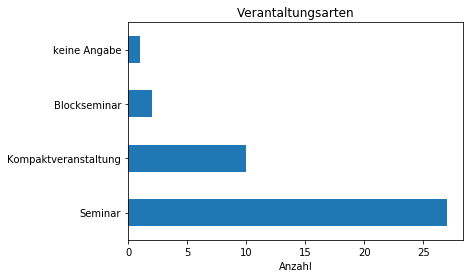

In [13]:
seminare['Veranstaltungsart'].value_counts().plot(kind='barh')
plt.title('Verantaltungsarten')
plt.xlabel('Anzahl')
plt.show()

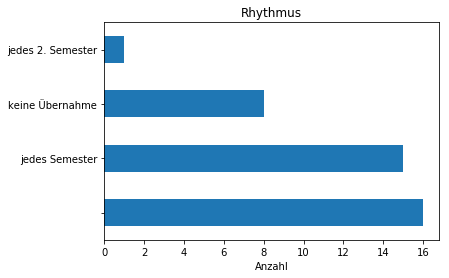

In [14]:
seminare['Rhythmus'].value_counts().plot(kind='barh')
plt.title('Rhythmus')
plt.xlabel('Anzahl')
plt.show()

# Wie viele Plätze gibt es insgesamt?

In [15]:
print('Plätze pro Seminar: {}'.format(seminare['Maximale Teilnehmer'].mean()))

Plätze pro Seminar: 30.75


In [17]:
print('Seminare: {}'.format(seminare.shape[0]))

Seminare: 40


In [18]:
from math import ceil
print('Plätze insgesamt im WS17/18: {}'.format(ceil(seminare['Maximale Teilnehmer'].mean()*seminare.shape[0])))

Plätze insgesamt im WS17/18: 1230


In [19]:
1189/3

396.3333333333333